In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')

In [ ]:
data1 = data.copy()

In [ ]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
data['FullDate'] = pd.to_datetime(data['FullDate'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


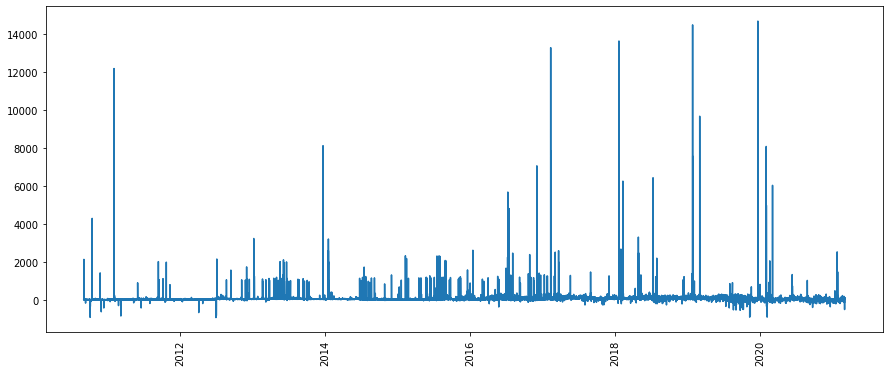

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.plot(data['FullDate'], data['ElecPrice'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
data = data.rename(columns={"FullDate":"ds", "ElecPrice":"y"})

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['SysLoad'])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )
#results in 

ADF Statistic: -18.17067542641451
p-value: 2.4474966090684217e-30
No. of lags used: 67
No. of observations used : 91948
Critical Values:
 1% : -3.430421121531399 
 5% : -2.861571434572286 
 10% : -2.566786731528145 


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['GasPrice'])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )
#results in 

ADF Statistic: -6.793388065452667
p-value: 2.3337605343636574e-09
No. of lags used: 48
No. of observations used : 91967
Critical Values:
 1% : -3.430421106837576 
 5% : -2.86157142807793 
 10% : -2.566786728071412 


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['y'])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )
#results in 

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used : 91962
Critical Values:
 1% : -3.430421110703783 
 5% : -2.8615714297867108 
 10% : -2.56678672898094 


In [ ]:
# SPLIT THE DATA
train_data = data[:2575]
test_data = data[2757:]

In [ ]:
train_data.shape

(2575, 5)

In [ ]:
model = Prophet()
model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
data.shape

(92016, 5)

In [ ]:
92016-2757

89259

In [ ]:
train_data.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
future = model.make_future_dataframe(periods =89259 , freq= 'D')
forecast = model.predict(future)
forecast.head() 

KeyboardInterrupt: ignored

In [ ]:
yhat = forecast["yhat"]

In [53]:
data1["FullDate"] = pd.to_datetime(data1["FullDate"])

In [54]:
data1.set_index("FullDate", inplace = True)

In [55]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(data1['ElecPrice'], freq = 'M', model= 'additive' )
decompose_series.plot()
plt.show()

TypeError: ignored